In [12]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})
from datetime import datetime as dt
from ipywidgets import interact

In [2]:
df = pd.read_csv('data/historical_rankings.csv', parse_dates=['date'], index_col=0)
df.head()

,name,symbol,mcap,price,supply,volume,date,ranking
0,Bitcoin,BTC,1.096958e+09,96.610000,11354025.0,0.0,2013-06-30,1
1,Litecoin,LTC,5.672152e+07,2.980000,19030604.0,0.0,2013-06-30,2
2,Namecoin,NMC,2.995222e+06,0.501427,5973400.0,0.0,2013-06-30,3
3,Peercoin,PPC,2.367684e+06,0.121734,19449710.0,0.0,2013-06-30,4
4,Novacoin,NVC,9.314370e+05,3.090000,301181.0,0.0,2013-06-30,5


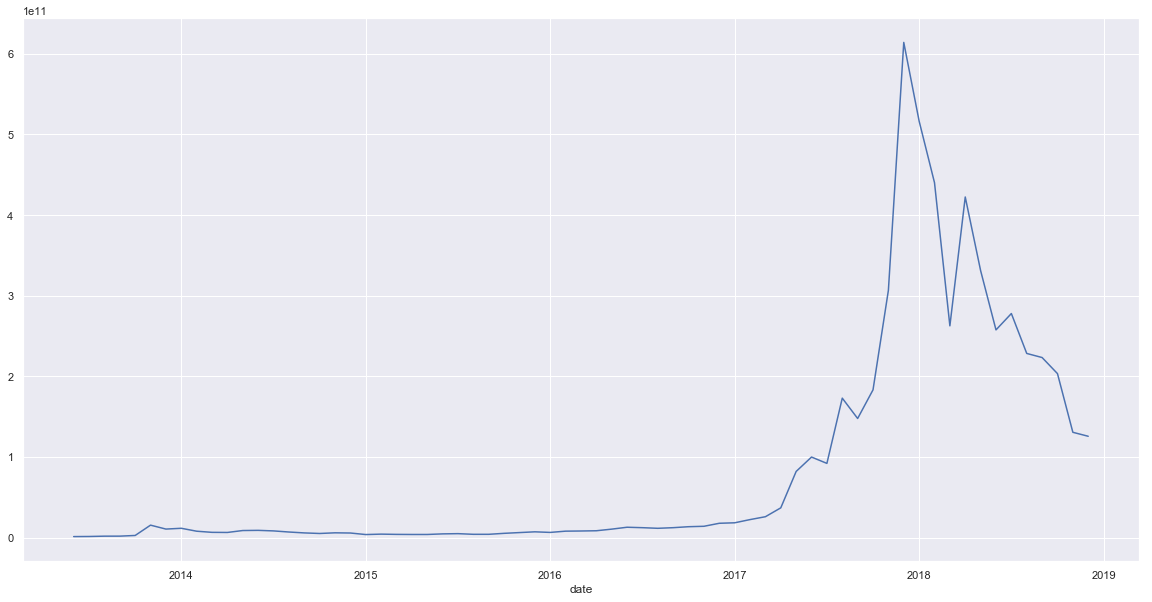

In [13]:
total_mcap = df.groupby('date').mcap.sum()
total_mcap.plot()

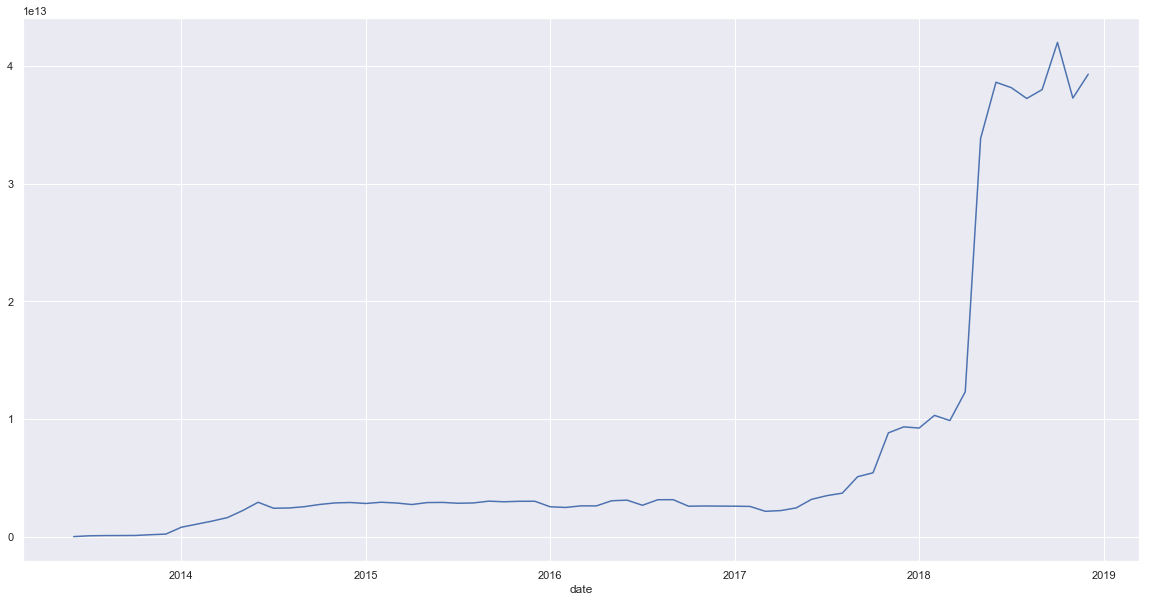

In [14]:
total_supply = df.groupby('date').supply.sum()
total_supply.plot()

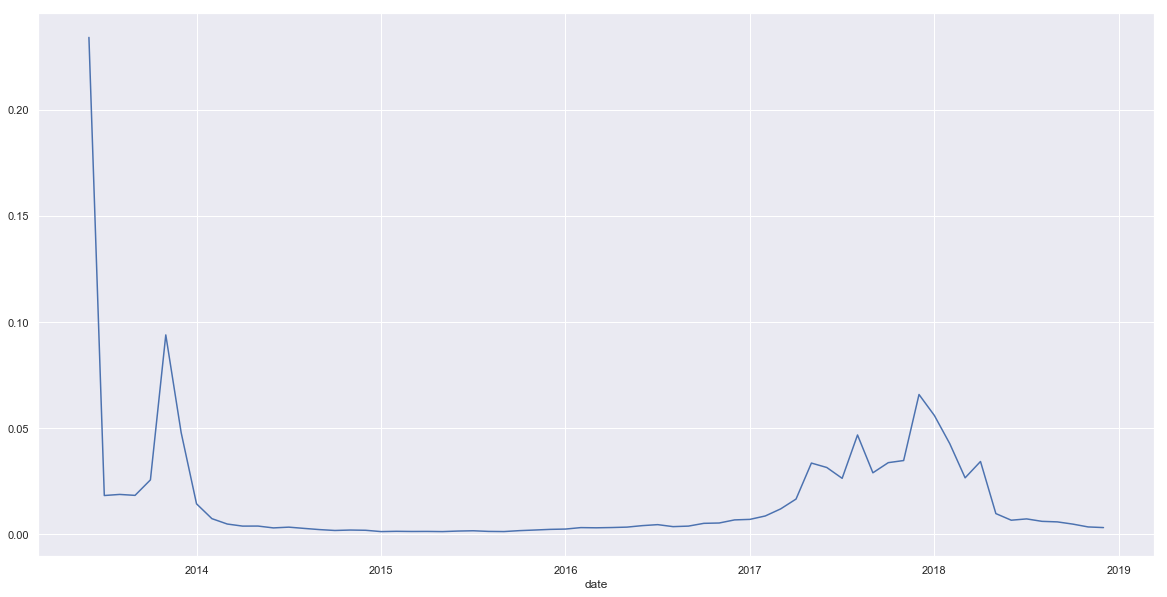

In [15]:
mcap_to_supply = total_mcap/total_supply
mcap_to_supply.plot()

In [6]:
mcap_to_supply.idxmin(), mcap_to_supply.idxmax()

(Timestamp('2015-05-31 00:00:00'), Timestamp('2013-06-30 00:00:00'))

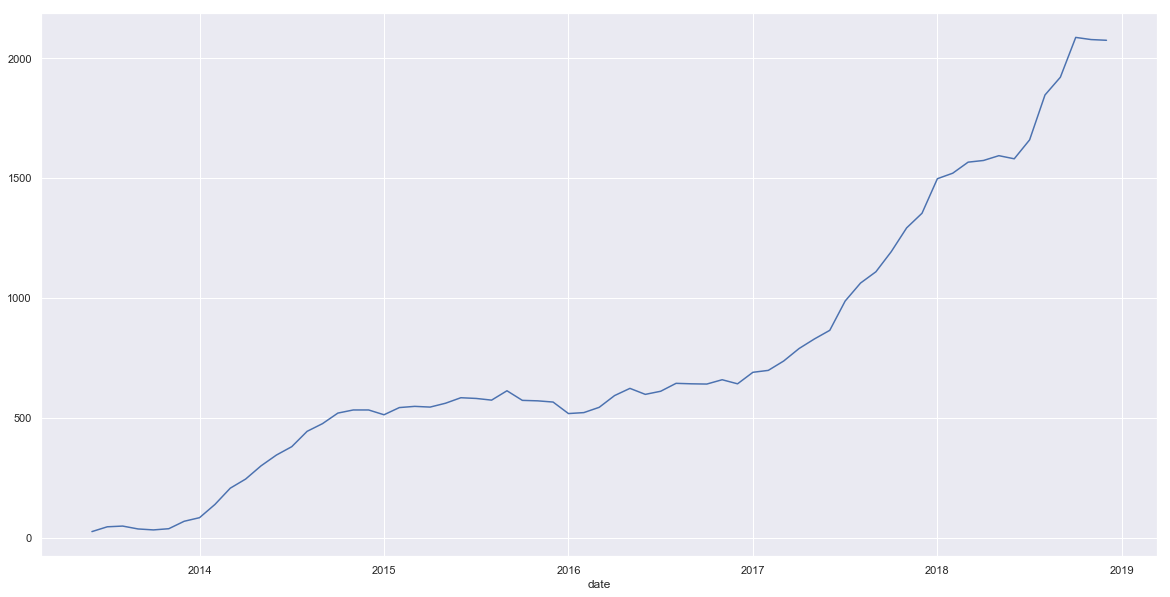

In [16]:
total_tokens = df.groupby('date').supply.count()
total_tokens.plot()

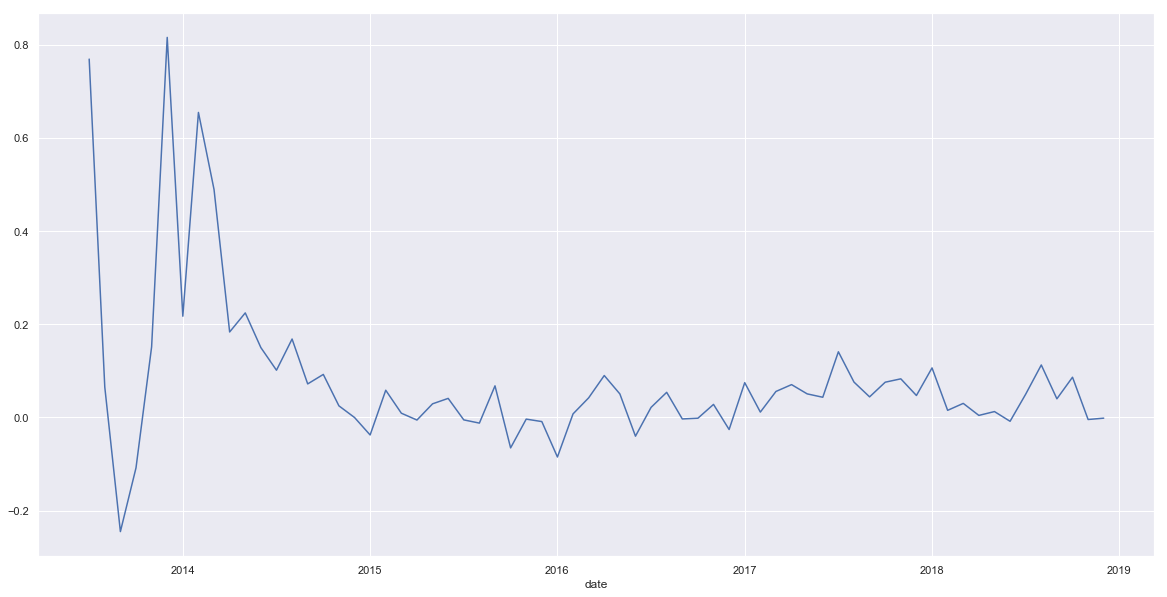

In [17]:
total_tokens.pct_change().plot()

In [18]:
top_50 = df.groupby('symbol').ranking.mean().sort_values().head(50).index.to_series()                           

In [19]:
important_tokens = df[df.symbol.isin(top_50)]
grouped = important_tokens.groupby('symbol')

feature_generators = {
    'Supply': lambda t: t.supply,
    'Ranking': lambda t: t.ranking,
    'Ranking change': lambda t: t.ranking.diff(),
    'Ranking change (%)': lambda t: t.ranking.pct_change(),
    'Rewards': lambda t: t.price * t.supply.diff(),
    'Supply change': lambda t: t.supply.diff(),
    'Supply change (%)': lambda t: t.supply.pct_change(),
    'Market cap': lambda t: t.mcap,
    'Market cap change (%)': lambda t: t.mcap.pct_change(),
    'Price to supply': lambda t: t.price / t.supply,
    'Volume to supply': lambda t: t.volume / t.supply
}

timeseries = {}
def view_feature(Symbol, Feature):
    global timeseries 
    if Symbol == 'All Tokens':
        if Feature in timeseries:
            ts = timeseries[Feature]
            if Feature in ['Ranking', 'Market cap'] or '%' in Feature:
                return ts.mean().sort_values(ascending=False).plot(kind='barh')
            else:
                return ts.sum().sort_values().plot(kind='barh')
            
    else:
        group = grouped.get_group(Symbol).set_index('date').sort_index()
        ts = feature_generators[Feature](group)
        if Feature not in timeseries:
            timeseries[Feature] = pd.DataFrame()
        timeseries[Feature][Symbol] = ts
        return ts.plot()
    
interact(view_feature, Symbol=['All Tokens']+top_50.values.tolist(), Feature=feature_generators.keys())

interactive(children=(Dropdown(description='Symbol', options=('All Tokens', 'BTC', 'ETH', 'XRP', 'LTC', 'ADA',…

<function __main__.view_feature(Symbol, Feature)>